In [62]:
%matplotlib inline

In [63]:
%gui qt

In [64]:
import mne
import numpy as np

In [65]:
job_arg = 8
# uncomment lines below to use CUDA
# mne.utils.set_config('MNE_USE_CUDA', 'true')
# job_arg = 'cuda'

# disable line below to enable interactive plots
mne.viz.set_browser_backend('matplotlib')

'matplotlib'

In [66]:
# read mne-python format
raw = mne.io.read_raw_fif('../data/eeg_2022-04-05_12_56_04_1_experiment_raw.fif')
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw.load_data()
raw.set_eeg_reference('average', projection=False, verbose=False)

Opening raw data file ../data/eeg_2022-04-05_12_56_04_1_experiment_raw.fif...
Isotrak not found
    Range : 0 ... 95518 =      0.000 ...   764.144 secs
Ready.
Reading 0 ... 95518  =      0.000 ...   764.144 secs...


<Raw | eeg_2022-04-05_12_56_04_1_experiment_raw.fif, 17 x 95519 (764.1 s), ~12.4 MB, data loaded>

Opening raw-browser...


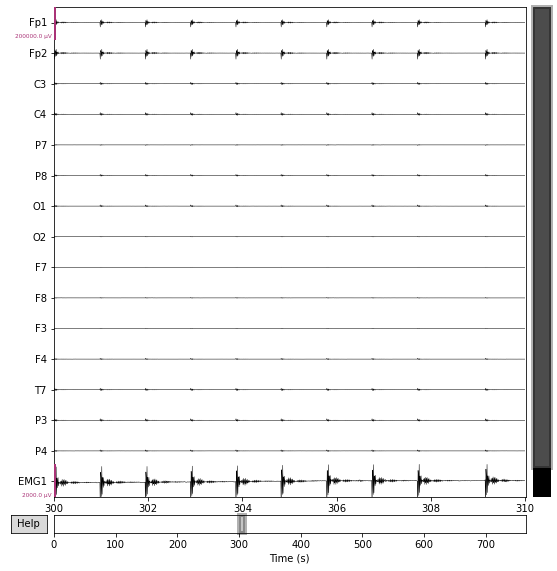

In [67]:
raw.pick_types(emg=True, eeg=True, stim=True, exclude=[])
plt = raw.plot(n_channels = 16, start = 300, duration = 10, scalings = dict(eeg = 10e-2), theme = 'dark')

In [68]:
raw.filter(l_freq=0.2, h_freq=49, n_jobs=job_arg)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 2063 samples (16.504 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    6.1s remaining:    1.4s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    6.4s finished


<Raw | eeg_2022-04-05_12_56_04_1_experiment_raw.fif, 17 x 95519 (764.1 s), ~12.4 MB, data loaded>

Effective window size : 16.384 (s)


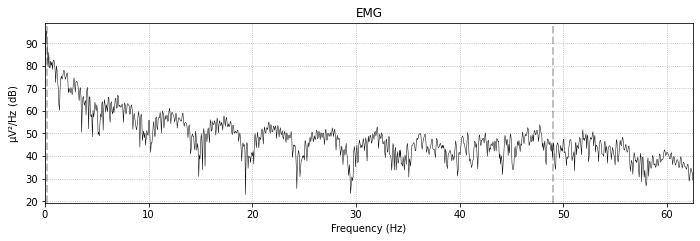

Effective window size : 16.384 (s)


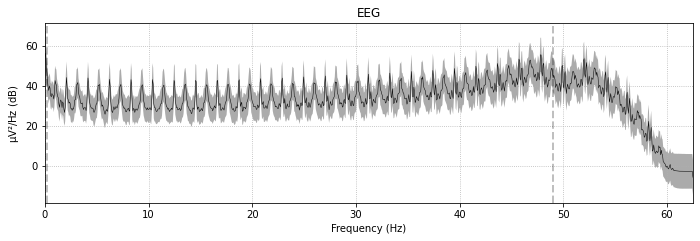

In [69]:
plt = raw.plot_psd(average=True, picks = ['emg'])
plt = raw.plot_psd(average=True, picks = ['eeg'])

Opening raw-browser...


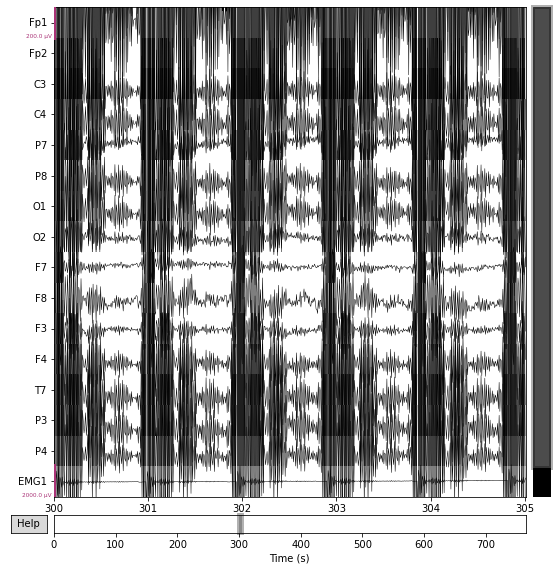

In [70]:
plt = raw.plot(n_channels = 16, start = 300, duration = 5, scalings = dict(eeg = 10e-5))

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
270 events found
Event IDs: [ 1  2  5 10 11 12]
Opening raw-browser...


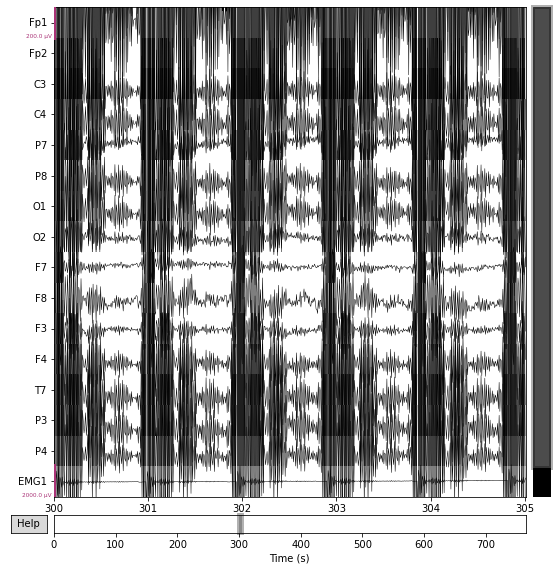

In [71]:
events = mne.find_events(raw)
event_ids = {
  'left': 11,
  'right': 12,
  'neutral': 10,
  'fixation': 1,
  'ready': 2,
}
plt = raw.plot(n_channels = 16, start = 300, duration = 5, scalings = dict(eeg = 10e-5))

In [72]:


ica = mne.preprocessing.ICA(n_components=0.999999, max_iter='auto', method='picard')
ica.fit(raw)
ica


Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by explained variance: 13 components
Fitting ICA took 3.7s.


<ICA | raw data decomposition, method: picard (fit in 80 iterations on 95519 samples), 13 ICA components explaining 100.0 % of variance (15 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=13, n_times=95519
    Range : 0 ... 95518 =      0.000 ...   764.144 secs
Ready.
Opening ica-browser...


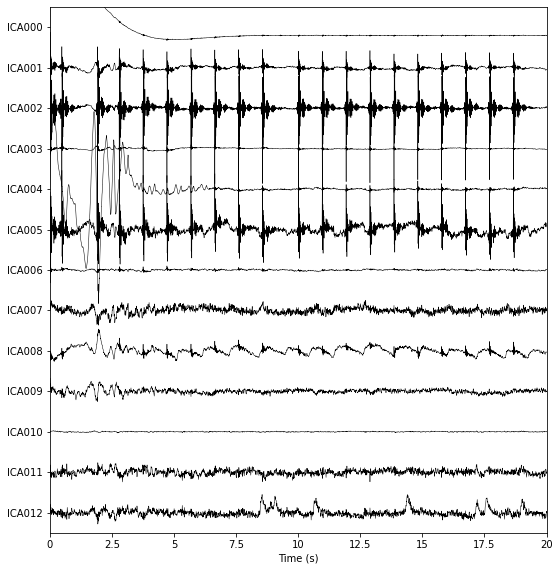

In [73]:
plt = ica.plot_sources(raw, show_scrollbars=False)

here it's obvious it found components that are regular intervals etc, we could try removing them

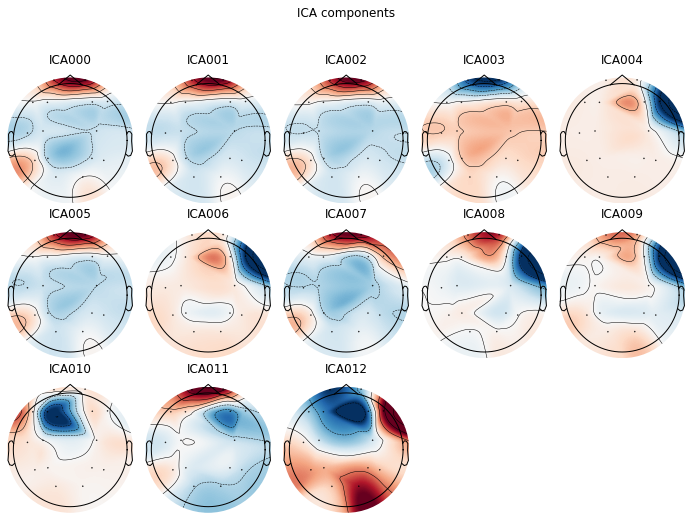

In [74]:
plt = ica.plot_components()

now we can plot what it looks like when we remove some of the signals! 

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


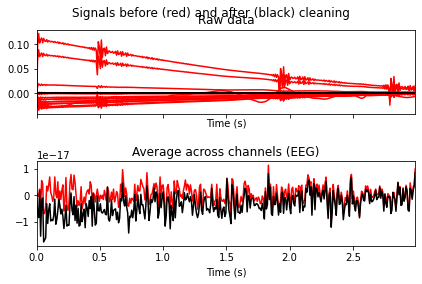

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


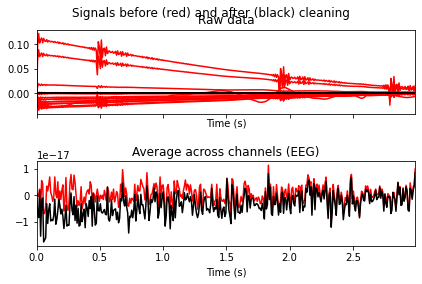

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


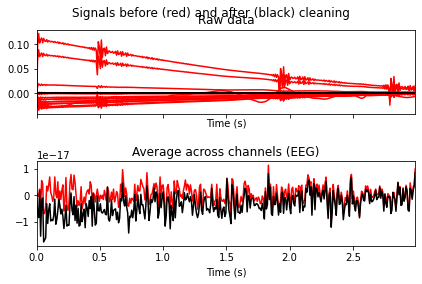

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


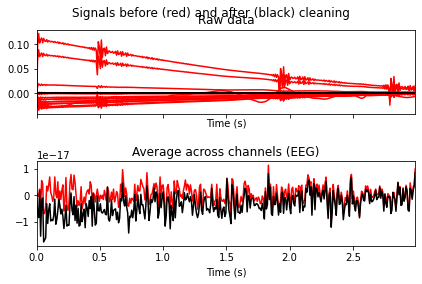

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


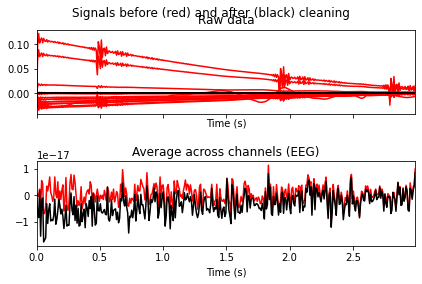

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 6 ICA components
    Projecting back using 15 PCA components


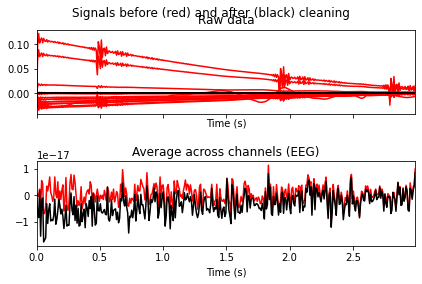

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 7 ICA components
    Projecting back using 15 PCA components


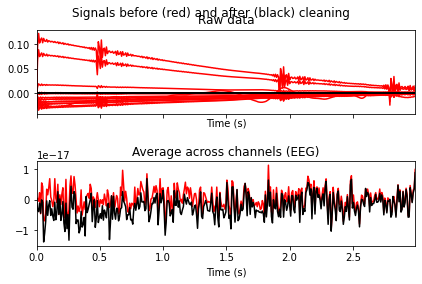

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 7 ICA components
    Projecting back using 15 PCA components


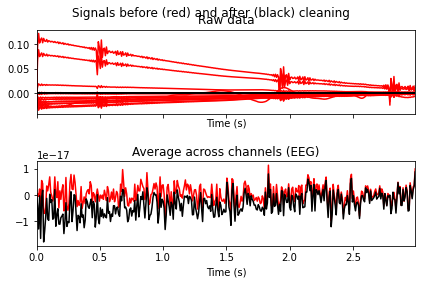

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 8 ICA components
    Projecting back using 15 PCA components


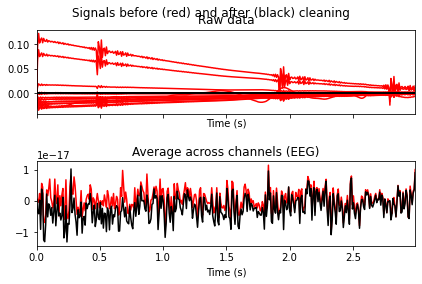

In [82]:
plt = ica.plot_overlay(raw, exclude=[0], picks='eeg') # drift
plt = ica.plot_overlay(raw, exclude=[1], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[2], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[3], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[4], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[5], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[6], picks='eeg') # weird artifact
plt = ica.plot_overlay(raw, exclude=[8], picks='eeg') # weird artifact

# now all werid shit
plt = ica.plot_overlay(raw, exclude=[0,1,2,3,4,5,6,8], picks='eeg') # weird artifact

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
382 matching events fo

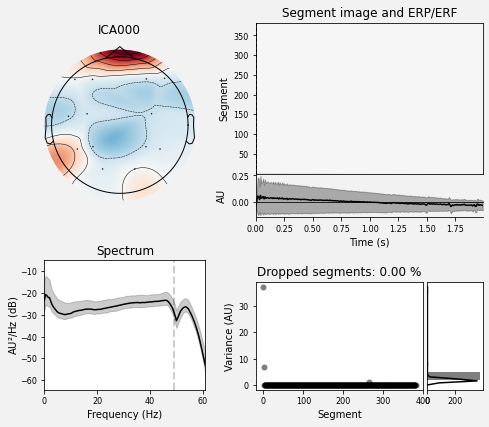

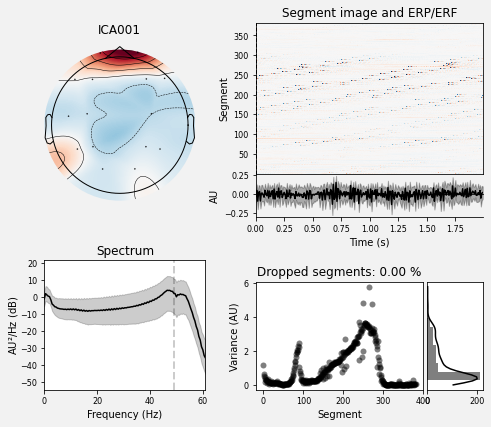

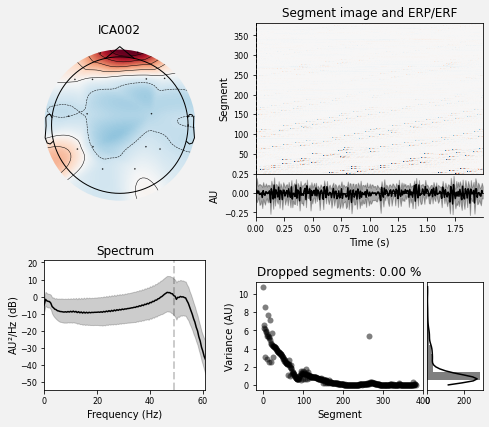

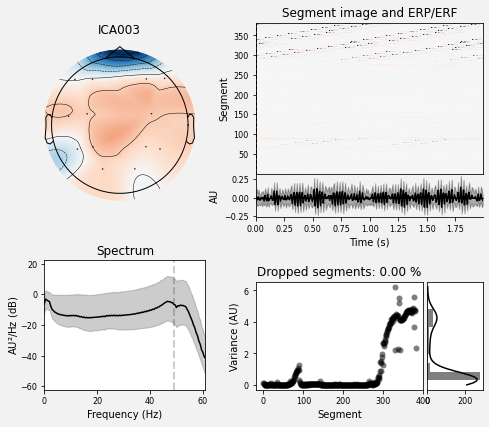

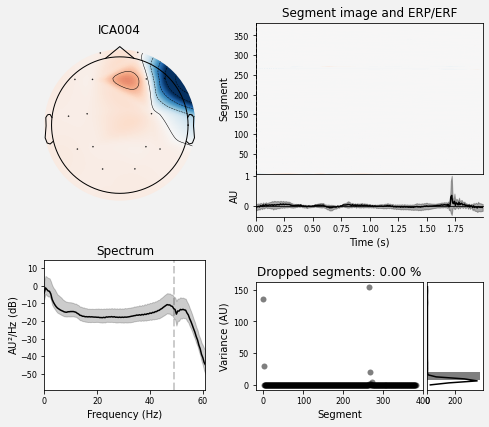

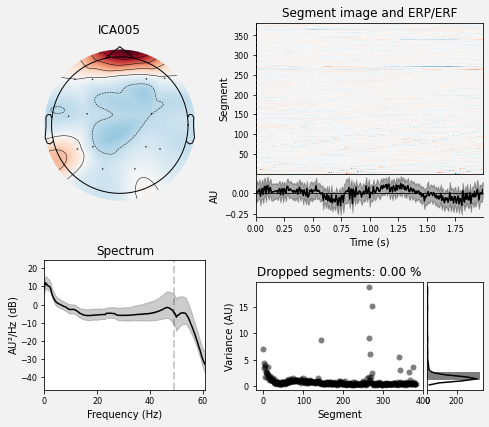

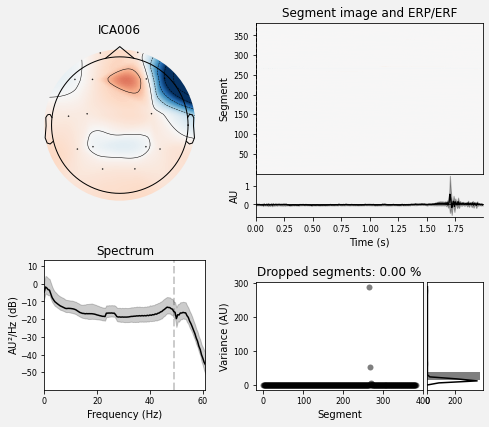

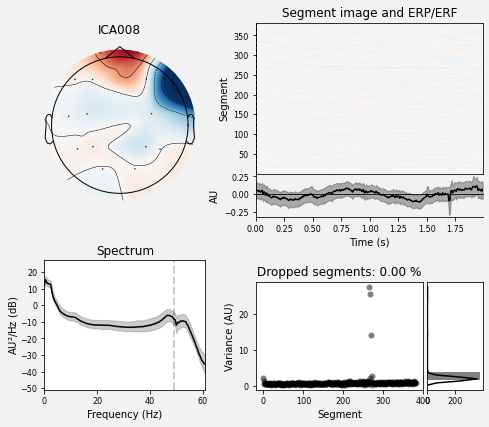

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [83]:
# another look
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6, 8])

In [84]:
# now we'll update our raw with applying the ica exclusions of bad shit
ica.exclude = [0,1,2,3,4,5,6,8]
raw_ica = raw.copy()
ica.apply(raw_ica)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 8 ICA components
    Projecting back using 15 PCA components


<Raw | eeg_2022-04-05_12_56_04_1_experiment_raw.fif, 17 x 95519 (764.1 s), ~12.4 MB, data loaded>

Opening raw-browser...


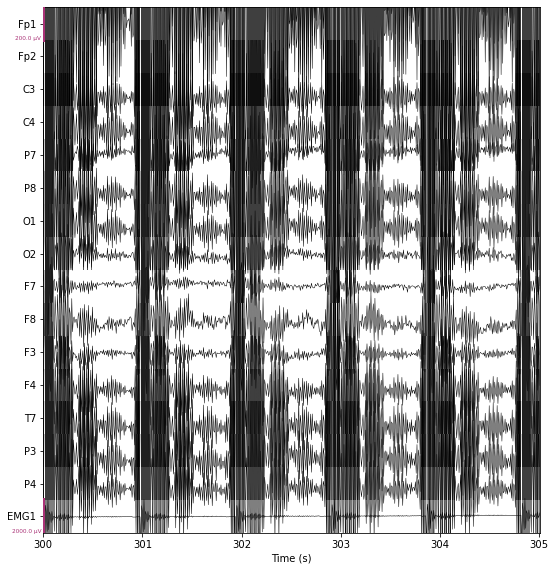

Opening raw-browser...


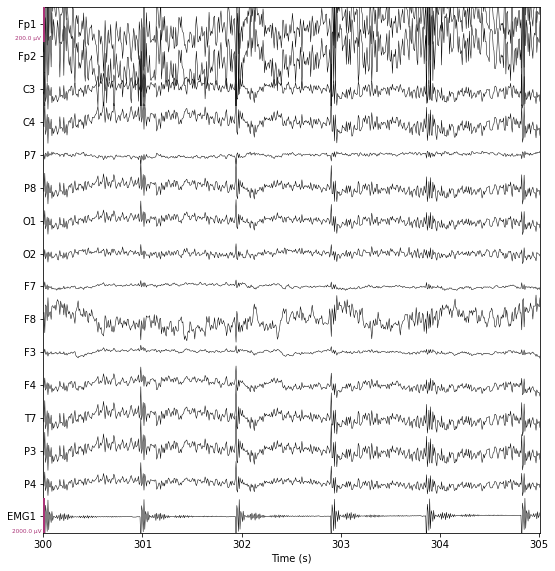

In [85]:
# lets plot our "CLEAN" data
plt = raw.plot(show_scrollbars=False, n_channels = 16, start = 300, duration = 5, scalings = dict(eeg = 10e-5))
plt = raw_ica.plot(show_scrollbars=False, n_channels = 16, start = 300, duration = 5, scalings = dict(eeg = 10e-5))

C:\Users\webma\AppData\Local\Temp\ipykernel_31272\2238173031.py:1: RuntimeWarning: event 5 missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=1000, first_samp=raw.first_samp, event_id=event_ids)


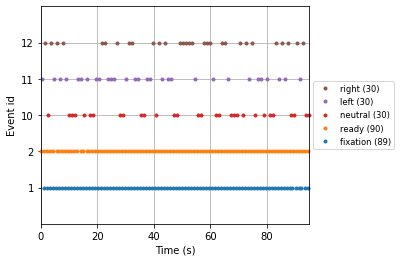

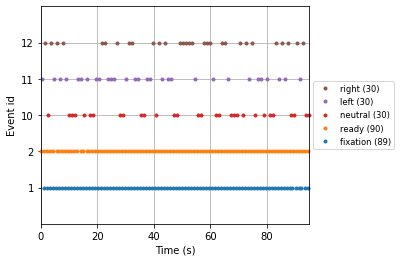

In [86]:
plt = mne.viz.plot_events(events, sfreq=1000, first_samp=raw.first_samp, event_id=event_ids)

In [87]:
tmin, tmax = -0.1, 1.9

reject = dict(eeg=150e-6)

# choosing only EEG channels for epoching
picks = mne.pick_types(raw_ica.info, meg=False, eeg=True, emg=True)

epochs = mne.Epochs(raw_ica, events, event_ids, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=reject, preload=True, verbose=False)

<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, F8, F3, F4, T7, EMG1, P3, P4
 chs: 15 EEG, 1 EMG
 custom_ref_applied: True
 dig: 18 items (3 Cardinal, 15 EEG)
 file_id: 4 items (dict)
 highpass: 0.2 Hz
 lowpass: 49.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 125.0 Hz
>
[]


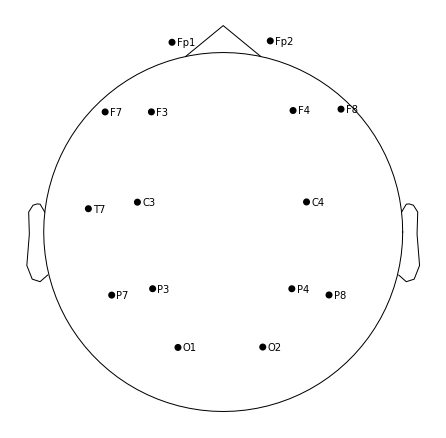

In [88]:
right_hand_epo = epochs['right']
print(right_hand_epo.info)
print(right_hand_epo.events) # no events, can't do anything
plt = right_hand_epo.plot_sensors(ch_type='eeg', show_names = True)
# plt = right_hand_epo.plot_image()